SETUP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


## MERGING CSV FILES

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit, regexp_extract
import os

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Wind Turbine Fault Detection") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.instances", "2") \
    .config("spark.executor.cores", "2") \
    .getOrCreate()

# Directory containing the files
directory = '/content/drive/MyDrive/Wind Farm C/datasets'

# List of specific files to read
specific_files = [
    "comma_59.csv", "comma_49.csv", "comma_48.csv", "comma_94.csv",
    "comma_75.csv", "comma_78.csv", "comma_91.csv", "comma_11.csv",
    "comma_39.csv", "comma_70.csv", "comma_54.csv"
]

# Initialize an empty DataFrame
combined_df = None

# Loop through each file and load it into Spark
for file in specific_files:
    file_path = os.path.join(directory, file)  # Construct the full file path
    df = spark.read.csv(file_path, header=True, inferSchema=True)

    # Extract the `event_id` and convert it to an integer within the Spark context
    df = df.withColumn("event_id", regexp_extract(lit(file), r'comma_(\d+)', 1).cast("int"))

    # Combine with the existing DataFrame
    if combined_df is None:
        combined_df = df
    else:
        combined_df = combined_df.union(df)

# Coalesce to a single partition and write as a single CSV file
combined_df.coalesce(1).write.csv('/content/drive/MyDrive/wind_farm_c_combined_2020-2023', header=True, mode='overwrite')


In [ ]:
import os

# Directory containing the CSV files
directory = 'Wind Farm C/datasets'

# Initialize a variable to store the total size
total_size = 0

# Iterate through the specific files
for file in specific_files:
    file_path = os.path.join(directory, file)  # Construct the full path
    if os.path.exists(file_path):  # Check if the file exists
        file_size = os.path.getsize(file_path)  # Get the file size in bytes
        total_size += file_size  # Add to the total size
    else:
        print(f"File not found: {file_path}")

# Convert total size to more readable units (e.g., MB)
total_size_gb = total_size / (1024 * 1024*1024)  # Convert bytes to megabytes

print(f"Total size of CSV files: {total_size} bytes ({total_size_gb:.2f} GB)")


Total size of CSV files: 3368525199 bytes (3.14 GB)


In [ ]:
import pandas as pd
event_info = pd.read_csv('Wind Farm C/comma_event_info.csv')

In [ ]:
event_info_spark=spark.createDataFrame(event_info)
wind_farm_c_spark=combined_df
wind_farm_c_spark_joined = wind_farm_c_spark.join(
    event_info_spark.select("event_id", "event_label", "event_description"),
    on="event_id",
    how="left")

In [ ]:
wind_farm_c_spark_joined.limit(20).toPandas()

,event_id,time_stamp,asset_id,id,train_test,status_type_id,sensor_0_avg,sensor_0_max,sensor_0_min,sensor_0_std,...,wind_speed_235_avg,wind_speed_235_max,wind_speed_235_min,wind_speed_235_std,wind_speed_237_avg,wind_speed_237_max,wind_speed_237_min,wind_speed_237_std,event_label,event_description
0,59,2019-02-17 00:00:00,32,0,train,0,35.723,41.9,30.2,2.8700,...,7.446,11.5,3.7,1.1450,7.676,12.4,3.0,1.324,normal,NaN
1,59,2019-02-17 00:10:00,32,1,train,0,31.241,35.7,25.3,1.8720,...,6.545,10.2,2.7,0.9994,6.813,10.5,2.5,1.175,normal,NaN
2,59,2019-02-17 00:20:00,32,2,train,0,32.560,38.3,26.3,2.8410,...,7.016,11.2,3.3,1.1720,7.204,11.2,2.7,1.293,normal,NaN
3,59,2019-02-17 00:30:00,32,3,train,0,35.799,40.0,32.5,1.5740,...,7.650,12.4,3.1,0.9954,8.039,11.6,3.4,1.131,normal,NaN
4,59,2019-02-17 00:40:00,32,4,train,0,36.927,40.6,33.1,1.8940,...,7.958,11.3,3.5,0.9269,8.530,11.9,3.3,1.118,normal,NaN
5,59,2019-02-17 00:50:00,32,5,train,0,35.608,39.0,31.5,1.5950,...,7.791,11.3,3.3,0.9932,8.311,12.3,3.0,1.154,normal,NaN
6,59,2019-02-17 01:00:00,32,6,train,0,31.079,37.7,27.3,2.2010,...,8.058,11.2,4.4,0.9834,8.301,11.4,3.2,1.287,normal,NaN
7,59,2019-02-17 01:10:00,32,7,train,0,27.871,34.8,22.1,3.3900,...,7.413,12.0,3.8,1.0820,7.597,11.7,2.5,1.236,normal,NaN
8,59,2019-02-17 01:20:00,32,8,train,0,25.301,27.9,23.1,1.0590,...,6.991,9.8,3.0,0.8607,7.175,10.7,1.8,1.131,normal,NaN
9,59,2019-02-17 01:30:00,32,9,train,0,25.329,27.9,22.4,1.1280,...,7.242,10.3,4.2,0.9197,7.389,10.4,2.9,1.141,normal,NaN


In [ ]:
# CSV dosyasını tek bir dosya olarak kaydetme
wind_farm_c_spark_joined.coalesce(1).write.option("header", "true").mode("overwrite").csv("/content/drive/MyDrive/wind_farm_c_combined_joined_eventids_2020-2023.csv")

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Wind Turbine Fault Detection").config("spark.executor.memory", "4g").config("spark.driver.memory", "4g").config("spark.executor.instances", "2").config("spark.executor.cores", "2").getOrCreate()
wind_farm_c_spark_joined = spark.read.csv('/content/drive/MyDrive/wind_farm_c_combined_joined_eventids_2020-2023.csv/part-00000-28a156d4-8e57-4cf5-b519-d5677a4b2795-c000.csv', header=True, inferSchema=True)

In [ ]:
# Identify feature columns (sensors and relevant numerical columns)
feature_columns = [col_name for col_name in wind_farm_c_spark_joined.columns if (('avg' in col_name) or ('max' in col_name) or ('min' in col_name) or ('std' in col_name))]


Summary Statistics (Spark Computed):
                                0
sensor_0_avg_mean       29.263304
sensor_0_max_mean       36.573124
sensor_0_min_mean       22.200246
sensor_0_std_mean        3.240126
sensor_1_avg_mean       -0.000071
...                           ...
wind_speed_235_std_max  16.414000
wind_speed_237_avg_max  51.655000
wind_speed_237_max_max  59.900000
wind_speed_237_min_max  20.800000
wind_speed_237_std_max  27.417000

[3808 rows x 1 columns]

Missing Values Analysis (Spark Computed):
                    Missing Count  Missing Percentage
sensor_0_avg                    0                 0.0
sensor_0_max                    0                 0.0
sensor_0_min                    0                 0.0
sensor_0_std                    0                 0.0
sensor_1_avg                    0                 0.0
...                           ...                 ...
wind_speed_235_std              0                 0.0
wind_speed_237_avg              0                 0.0
w

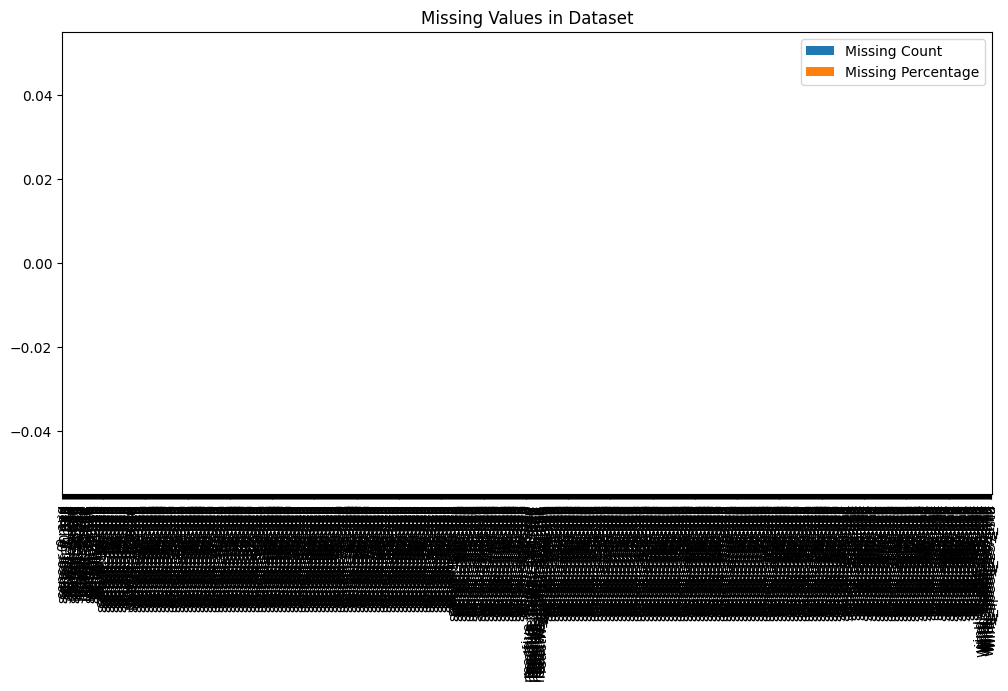

In [ ]:
"""## Exploratory Data Analysis (EDA) using PySpark"""

from pyspark.sql.functions import col, count, mean, stddev, min, max, isnan,when
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ **1. Summary Statistics (Fast in Spark)**
summary_stats = wind_farm_c_spark_joined.select(
    [mean(col(c)).alias(f"{c}_mean") for c in feature_columns] +
    [stddev(col(c)).alias(f"{c}_std") for c in feature_columns] +
    [min(col(c)).alias(f"{c}_min") for c in feature_columns] +
    [max(col(c)).alias(f"{c}_max") for c in feature_columns]
).toPandas()  # Convert only the summary stats to Pandas

print("Summary Statistics (Spark Computed):")
print(summary_stats.T)  # Transpose for better readability

# ✅ **2. Missing Values Analysis (Fast in Spark)**
missing_counts = wind_farm_c_spark_joined.select(
    [(count(when(col(c).isNull() | isnan(col(c)), c)).alias(c)) for c in feature_columns]
).toPandas().T  # Convert only missing value counts

missing_counts.columns = ["Missing Count"]
missing_counts["Missing Percentage"] = (missing_counts["Missing Count"] / wind_farm_c_spark_joined.count()) * 100
print("\nMissing Values Analysis (Spark Computed):")
print(missing_counts)

# Plot Missing Values
missing_counts.plot(kind='bar', figsize=(12, 6), title="Missing Values in Dataset")
plt.show()



In [ ]:
import random
selected_sensors = random.sample(feature_columns, min(50, len(feature_columns)))


In [ ]:

# ✅ **3. Sensor Data Distribution (Spark Histogram)**
hist_data = {}
for col_name in feature_columns:
    hist = wind_farm_c_spark_joined.select(col_name).rdd.flatMap(lambda x: x).histogram(20)
    hist_data[col_name] = hist

# Convert to Pandas for plotting
hist_df = pd.DataFrame({col: hist_data[col][1] for col in feature_columns}, index=hist_data[feature_columns[0]][0][:-1])
hist_df.plot(kind="bar", figsize=(15, 10), title="Sensor Data Distributions")
plt.show()

# ✅ **4. Feature Correlation (Computed in Spark)**
corr_matrix = {col1: {col2: wind_farm_c_spark_joined.stat.corr(col1, col2) for col2 in feature_columns} for col1 in feature_columns}
corr_df = pd.DataFrame(corr_matrix)

# Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap (Spark Computed)")
plt.show()

# ✅ **5. Time Series Trends (Spark Aggregation)**
time_series_data = wind_farm_c_spark_joined.groupBy("time_stamp").agg(
    *[mean(col(sensor)).alias(sensor) for sensor in selected_sensors]
).orderBy("time_stamp").toPandas()  # Convert only necessary aggregated data

# Plot Time Series Trends
plt.figure(figsize=(12, 6))
for sensor in selected_sensors:
    plt.plot(time_series_data["time_stamp"], time_series_data[sensor], label=sensor)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.title("Sensor Trends Over Time (Spark Aggregated)")
plt.show()

## LOAD JOINED CSV FROM DISK

In [ ]:
from pyspark.sql.functions import col, sum, mean, hour, dayofweek

wind_farm_c_spark_joined = wind_farm_c_spark_joined.withColumn("hour", hour("time_stamp"))
wind_farm_c_spark_joined = wind_farm_c_spark_joined.withColumn("day_of_week", dayofweek("time_stamp"))

## RANDOM FOREST CLASSIFIER

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# 'train_test' sütununa göre veri setini ayırıyoruz
train_df = wind_farm_c_spark_joined.filter(wind_farm_c_spark_joined['train_test'] == 'train')
test_df = wind_farm_c_spark_joined.filter(wind_farm_c_spark_joined['train_test'] == 'prediction')

In [ ]:
print('train:', train_df.count(), 'test:', test_df.count())

train: 576000 test: 29743


In [ ]:
# Adım 2: Etiketlerin sayısal verilere dönüştürülmesi
# 'event_label' sütununu sayısal hale getirelim: 1 -> 'normal', 0 -> 'anomaly'
train_df = train_df.withColumn("label", F.when(train_df['event_label'] == 'normal', 1)
                                           .otherwise(0))
test_df = test_df.withColumn("label", F.when(test_df['event_label'] == 'normal', 1)
                                        .otherwise(0))

In [ ]:

# Rest of your code for creating the Random Forest model and pipeline
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=100)
pipeline = Pipeline(stages=[assembler, rf])
model = pipeline.fit(train_df)
train_predictions = model.transform(train_df)
evaluator = BinaryClassificationEvaluator(labelCol="label")
train_accuracy = evaluator.evaluate(train_predictions)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.9981945177646213


### Evaluation

In [ ]:
# Confusion Matrix bileşenlerini hesapla
predictions = model.transform(test_df)
true_positives = predictions.filter((predictions.label == 1) & (predictions.prediction == 1)).count()
true_negatives = predictions.filter((predictions.label == 0) & (predictions.prediction == 0)).count()
false_positives = predictions.filter((predictions.label == 0) & (predictions.prediction == 1)).count()
false_negatives = predictions.filter((predictions.label == 1) & (predictions.prediction == 0)).count()

print(f"TP: {true_positives}, TN: {true_negatives}, FP: {false_positives}, FN: {false_negatives}")

TP: 11812, TN: 14906, FP: 0, FN: 3025


In [ ]:
test_accuracy = evaluator.evaluate(predictions)


In [ ]:
test_accuracy

0.9997705827178168

In [ ]:
# prompt: print stats for predictions. f1 score etc

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate the model using a MulticlassClassificationEvaluator
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predictions)
print(f"F1 Score: {f1_score}")


evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(predictions)
print(f"Weighted Precision: {precision}")


evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(predictions)
print(f"Weighted Recall: {recall}")

# Calculate Accuracy
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
print(f"Accuracy: {accuracy}")

F1 Score: 0.8972076151402266
Weighted Precision: 0.915453192304091
Weighted Recall: 0.8982953972363246
Accuracy: 0.8982953972363246


### Save the model
* skip this step

###   GBT


In [ ]:
from pyspark.ml.classification import GBTClassifier
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
# Initialize Gradient Boosted Tree model
gbt = GBTClassifier(labelCol="label", featuresCol="features", maxIter=50)

# Create a pipeline
pipeline_gbt = Pipeline(stages=[assembler, gbt])

# Train the GBT model
model_gbt = pipeline_gbt.fit(train_df)

# Make predictions
predictions_gbt = model_gbt.transform(test_df)

# Evaluate GBT model
evaluator_gbt = BinaryClassificationEvaluator(labelCol="label")
accuracy_gbt = evaluator_gbt.evaluate(predictions_gbt)
print(f"Gradient Boosted Trees Accuracy: {accuracy_gbt}")

# Save the model
model_gbt.save("/content/drive/MyDrive/wind_farmc_2020-2023_gbt")


Gradient Boosted Trees Accuracy: 0.9999218214196667


In [ ]:
# prompt: load gbt model, then evaluate using other metrics

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import PipelineModel # Import PipelineModel

# Load the saved GBT model using PipelineModel.load()
loaded_gbt_model = PipelineModel.load("/content/drive/MyDrive/wind_farmc_2020-2023_gbt")

# Make predictions on the test data using the loaded model
predictions_gbt = loaded_gbt_model.transform(test_df)

# Evaluate the model using other metrics
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predictions_gbt)
print(f"GBT F1 Score: {f1_score}")

evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(predictions_gbt)
print(f"GBT Weighted Precision: {precision}")

evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(predictions_gbt)
print(f"GBT Weighted Recall: {recall}")

# Calculate the confusion matrix components
true_positives = predictions_gbt.filter((predictions_gbt.label == 1) & (predictions_gbt.prediction == 1)).count()
true_negatives = predictions_gbt.filter((predictions_gbt.label == 0) & (predictions_gbt.prediction == 0)).count()
false_positives = predictions_gbt.filter((predictions_gbt.label == 0) & (predictions_gbt.prediction == 1)).count()
false_negatives = predictions_gbt.filter((predictions_gbt.label == 1) & (predictions_gbt.prediction == 0)).count()

# Calculate Accuracy
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
print(f"GBT Accuracy: {accuracy}")

GBT F1 Score: 0.8972076151402266
GBT Weighted Precision: 0.915453192304091
GBT Weighted Recall: 0.8982953972363246
GBT Accuracy: 0.8982953972363246


In [ ]:
rf = RandomForestClassifier(
    labelCol="label",
    featuresCol="features",
    numTrees=200,  # More trees = better generalization
    maxDepth=10,   # Avoid overfitting
    minInstancesPerNode=5,  # Regularization
    featureSubsetStrategy="sqrt"  # Better feature selection
)

pipeline = Pipeline(stages=[assembler, rf])
model = pipeline.fit(train_df)
train_predictions = model.transform(train_df)
evaluator = BinaryClassificationEvaluator(labelCol="label")
train_accuracy = evaluator.evaluate(train_predictions)
print(f"Training Accuracy: {train_accuracy}")
# Confusion Matrix bileşenlerini hesapla
predictions = model.transform(test_df)
true_positives = predictions.filter((predictions.label == 1) & (predictions.prediction == 1)).count()
true_negatives = predictions.filter((predictions.label == 0) & (predictions.prediction == 0)).count()
false_positives = predictions.filter((predictions.label == 0) & (predictions.prediction == 1)).count()
false_negatives = predictions.filter((predictions.label == 1) & (predictions.prediction == 0)).count()

print(f"TP: {true_positives}, TN: {true_negatives}, FP: {false_positives}, FN: {false_negatives}")

# prompt: print stats for predictions. f1 score etc

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# ... (your existing code)

# Evaluate the model using a MulticlassClassificationEvaluator
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predictions)
print(f"F1 Score: {f1_score}")


evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(predictions)
print(f"Weighted Precision: {precision}")


evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(predictions)
print(f"Weighted Recall: {recall}")

# Calculate Accuracy
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
print(f"Accuracy: {accuracy}")

model.save("/content/drive/MyDrive/wind_farmc_2020-2023_rf2")

Training Accuracy: 0.998517818747627
TP: 11812, TN: 14906, FP: 0, FN: 3025
F1 Score: 0.8972076151402266
Weighted Precision: 0.915453192304091
Weighted Recall: 0.8982953972363246
Accuracy: 0.8982953972363246


In [ ]:
from pyspark.ml import PipelineModel

# Load the saved model
model = PipelineModel.load("/content/drive/MyDrive/wind_farmc_5gb_rf")

# Now you can use the loaded model for predictions
# Example:
# predictions = model.transform(your_test_data)

Py4JJavaError: An error occurred while calling o6726.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/content/drive/MyDrive/wind_farm_c_model_5gb.h/metadata
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:304)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:210)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:294)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:290)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:294)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:290)
	at org.apache.spark.api.java.JavaRDDLike.partitions(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.JavaRDDLike.partitions$(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:45)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.io.IOException: Input path does not exist: file:/content/drive/MyDrive/wind_farm_c_model_5gb.h/metadata
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:278)
	... 25 more


### Normal and anomalous events

In [ ]:
# Normal ve anormal olaylar için temel istatistiksel özet
normal_events = wind_farm_c_spark_joined.filter(wind_farm_c_spark_joined['event_label'] == 'normal')
anomalous_events = wind_farm_c_spark_joined.filter(wind_farm_c_spark_joined['event_label'] == 'anomaly')

In [ ]:
normal_stats = normal_events.describe().show()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
anomalous_stats = anomalous_events.describe().show()

In [ ]:
pip install dask

In [ ]:

# Read in Pandas
import pandas as pd
import dask.dataframe as dd

# Read large Parquet file in chunks using Dask
# Read in Pandas
import pandas as pd
import dask.dataframe as dd

# Read large Parquet file in chunks using Dask
df = dd.read_parquet("wind_farm_data.parquet")

# Convert time column to datetime format using Dask's `to_datetime`
df["time_stamp"] = dd.to_datetime(df["time_stamp"])  # Use dd.to_datetime instead of pd.to_datetime

# Compute only necessary parts (Avoid full .compute()!)
df = df.sort_values(by="time_stamp").persist()

# Convert to Pandas only when needed
df_sample = df.sample(frac=0.1).compute()  # Load only 10% for debugging

print(df_sample.head())  # Check data before full processing



       sensor_0_avg  sensor_0_max  sensor_0_min  sensor_0_std  sensor_1_avg  \
14372        11.141          16.6           5.8         2.083        0.0282   
11529         0.000           0.0           0.0         0.000        0.0001   
17150         0.000           0.0           0.0         0.000       -0.0001   
12074        57.457          66.3          52.6         2.730       -0.0008   
12085         0.000           0.0           0.0         0.000        0.0002   

       sensor_1_max  sensor_1_min  sensor_1_std  power_2_avg  power_2_max  \
14372        0.7900       -0.8799        0.2361     0.130464      0.18782   
11529        0.0099       -0.0099        0.0029     0.000000      0.00000   
17150        0.0099       -0.0099        0.0030     0.000000      0.00000   
12074        0.5400       -0.5500        0.1465     0.664940      0.76056   
12085        0.0099       -0.0099        0.0025     0.000000      0.00000   

       ...  wind_speed_235_max  wind_speed_235_min  wind_speed

In [ ]:
wind_farm_c_spark_joined.columns

['event_id',
 'time_stamp',
 'asset_id',
 'id',
 'train_test',
 'status_type_id',
 'sensor_0_avg',
 'sensor_0_max',
 'sensor_0_min',
 'sensor_0_std',
 'sensor_1_avg',
 'sensor_1_max',
 'sensor_1_min',
 'sensor_1_std',
 'power_2_avg',
 'power_2_max',
 'power_2_min',
 'power_2_std',
 'sensor_3_avg',
 'sensor_3_max',
 'sensor_3_min',
 'sensor_3_std',
 'sensor_4_avg',
 'sensor_4_max',
 'sensor_4_min',
 'sensor_4_std',
 'power_5_avg',
 'power_5_max',
 'power_5_min',
 'power_5_std',
 'power_6_avg',
 'power_6_max',
 'power_6_min',
 'power_6_std',
 'sensor_7_avg',
 'sensor_7_max',
 'sensor_7_min',
 'sensor_7_std',
 'sensor_8_avg',
 'sensor_8_max',
 'sensor_8_min',
 'sensor_8_std',
 'sensor_9_avg',
 'sensor_9_max',
 'sensor_9_min',
 'sensor_9_std',
 'sensor_10_avg',
 'sensor_10_max',
 'sensor_10_min',
 'sensor_10_std',
 'sensor_11_avg',
 'sensor_11_max',
 'sensor_11_min',
 'sensor_11_std',
 'sensor_12_avg',
 'sensor_12_max',
 'sensor_12_min',
 'sensor_12_std',
 'sensor_13_avg',
 'sensor_13_max'

In [ ]:
import dask.array as da
import dask.dataframe as dd
from pyspark.sql.functions import when

# Ensure label column exists
wind_farm_c_spark_joined = wind_farm_c_spark_joined.withColumn(
    "label", when(wind_farm_c_spark_joined["event_label"] == "normal", 1).otherwise(0)
)

# Train-test split based on 'train_test' column
train_df = wind_farm_c_spark_joined.filter(wind_farm_c_spark_joined["train_test"] == "train")
test_df = wind_farm_c_spark_joined.filter(wind_farm_c_spark_joined["train_test"] == "prediction")

# Save as Parquet (for efficient loading)
train_df.write.mode("overwrite").parquet("train_data.parquet")
test_df.write.mode("overwrite").parquet("test_data.parquet")

# Load into Dask instead of Pandas



KeyError: "['day_of_week'] not in index"

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
train_dd = dd.read_parquet("train_data.parquet")
test_dd = dd.read_parquet("test_data.parquet")

# Convert time column to datetime format
train_dd["time_stamp"] = dd.to_datetime(train_dd["time_stamp"])
test_dd["time_stamp"] = dd.to_datetime(test_dd["time_stamp"])
# Convert Dask DataFrame to Dask Arrays
X_train = train_dd[feature_columns].to_dask_array(lengths=True)
y_train = train_dd["label"].to_dask_array(lengths=True)
X_test = test_dd[feature_columns].to_dask_array(lengths=True)
y_test = test_dd["label"].to_dask_array(lengths=True)

# Sliding window function optimized for Dask
def create_sequences_dask(features, labels, window_size=10):
    """Create sequences in batches to prevent memory overflow."""
    num_samples = len(features) - window_size
    X = da.stack([features[i : i + window_size] for i in range(num_samples)], axis=0)
    y = da.array([labels[i + window_size] for i in range(num_samples)])
    return X, y

# Process sliding window separately for training and testing
X_train_seq, y_train_seq = create_sequences_dask(X_train, y_train, window_size=10)
X_test_seq, y_test_seq = create_sequences_dask(X_test, y_test, window_size=10)

# Compute only necessary parts
X_train_np, y_train_np = X_train_seq.compute_chunk_sizes(), y_train_seq.compute_chunk_sizes()
X_test_np, y_test_np = X_test_seq.compute_chunk_sizes(), y_test_seq.compute_chunk_sizes()

print("Eğitim verisi boyutu:", X_train_np.shape)
print("Test verisi boyutu:", X_test_np.shape)


In [ ]:
# Sensör ve zaman temelli özellikleri hazırlama
features = df[feature_columns].to_dask_array(lengths=True) # Convert to Dask array
labels = df["label"].to_dask_array(lengths=True) # Convert to Dask array

# Sliding window oluşturma
def create_sequences(features, labels, window_size=10):
    X, y = [], []
    for i in range(len(features) - window_size):
        X.append(features[i:i+window_size])
        y.append(labels[i+window_size])
    return np.array(X), np.array(y)

# Sliding window ile veri seti oluştur (compute here to get numpy arrays)
X, y = create_sequences(features.compute(), labels.compute(), window_size=10)

# Eğitim ve test setine ayır (Shuffle is False to maintain time-series order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# LSTM Modeli
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification için sigmoid aktivasyon
])

# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğit
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=4,
    batch_size=64
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/4
11011/11011 ━━━━━━━━━━━━━━━━━━━━ 88s 7ms/step - accuracy: 0.8558 - loss: 0.3024 - val_accuracy: 0.9240 - val_loss: 0.1647
Epoch 2/4
11011/11011 ━━━━━━━━━━━━━━━━━━━━ 78s 7ms/step - accuracy: 0.9206 - loss: 0.1761 - val_accuracy: 0.9410 - val_loss: 0.1284
Epoch 3/4
11011/11011 ━━━━━━━━━━━━━━━━━━━━ 86s 7ms/step - accuracy: 0.9338 - loss: 0.1446 - val_accuracy: 0.9443 - val_loss: 0.1210
Epoch 4/4
11011/11011 ━━━━━━━━━━━━━━━━━━━━ 139s 7ms/step - accuracy: 0.9393 - loss: 0.1304 - val_accuracy: 0.9477 - val_loss: 0.1094


In [ ]:
# Continue training the model for additional epochs
history_continued = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=2,  # Add more epochs
    batch_size=64
)


Epoch 1/2
11011/11011 ━━━━━━━━━━━━━━━━━━━━ 85s 8ms/step - accuracy: 0.9422 - loss: 0.1234 - val_accuracy: 0.9429 - val_loss: 0.1211
Epoch 2/2
11011/11011 ━━━━━━━━━━━━━━━━━━━━ 136s 7ms/step - accuracy: 0.9436 - loss: 0.1181 - val_accuracy: 0.9481 - val_loss: 0.1075


### Evaluation

In [ ]:
# prompt: find test accuracy of model (lstm model above)

# Evaluate the LSTM model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

5506/5506 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9486 - loss: 0.1074
Test Loss: 0.10753969848155975
Test Accuracy: 0.9480929374694824


In [ ]:
# prompt: show matches of labels and predictions counts for lstm model above

from sklearn.metrics import confusion_matrix
import numpy as np

# Predict on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print(f"\nTrue Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

5506/5506 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
Confusion Matrix:
[[72068  4546]
 [ 4598 94949]]

True Positives (TP): 94949
True Negatives (TN): 72068
False Positives (FP): 4546
False Negatives (FN): 4598


### Save the model

In [ ]:
# prompt: save the lstm model to path

model.save("/content/drive/MyDrive/wind_farm_c_lstm_model5gb.h5")

## STREAMING
### STREAMING TRIAL WITH TEST DATA

In [ ]:
import numpy as np
import time
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow INFO and WARNING logs

import tensorflow as tf
from sklearn.metrics import accuracy_score

# Load TensorFlow model
#model = tf.keras.models.load_model("lstm_trained_model.h5")

# Use X_test for streaming (loaded from your previous code)
print("X_test shape:", X_test.shape)

# Define streaming simulation from X_test
def stream_from_test_data(X_test, batch_size=10, interval=1):
    """Simulate streaming using X_test data."""
    for i in range(0, len(X_test), batch_size):
        batch = X_test[i:i + batch_size]
        yield batch, i  # Return batch and its starting index
        time.sleep(interval)

# Stream data from X_test
data_stream = stream_from_test_data(X_test, batch_size=10, interval=1)

# Function to process each streamed batch
def process_stream(data_stream):
    total_predictions = 0
    correct_predictions = 0

    for batch, batch_start_index in data_stream:
        # Predict using TensorFlow model
        predictions = model.predict(batch)

        # Convert predictions to binary labels
        predicted_labels = (np.array(predictions) > 0.5).astype(int)

        # Compare predictions with corresponding ground truth
        ground_truth = y_test[batch_start_index:batch_start_index + len(predicted_labels)]
        batch_accuracy = accuracy_score(ground_truth, predicted_labels)

        # Update running totals for global accuracy
        total_predictions += len(ground_truth)
        correct_predictions += (predicted_labels.flatten() == ground_truth).sum()

        # Output predictions and accuracy
        print(f"Batch {batch_start_index // 10 + 1}: Accuracy: {batch_accuracy:.2f}")
        for i, pred in enumerate(predictions):
            print(f"  Sequence {i + 1}: Prediction: {pred[0]} | Actual: {ground_truth[i]}")

    # Final global accuracy
    global_accuracy = correct_predictions / total_predictions
    print(f"Global Streaming Accuracy: {global_accuracy:.2f}")

# Start processing stream
try:
    process_stream(data_stream)
except KeyboardInterrupt:
    print("Streaming stopped.")


X_test shape: (109570, 10, 16)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Batch 1: Accuracy: 0.90
  Sequence 1: Prediction: 5.9627785958582535e-05 | Actual: 0
  Sequence 2: Prediction: 3.3821283977886196e-06 | Actual: 0
  Sequence 3: Prediction: 0.5234358906745911 | Actual: 0
  Sequence 4: Prediction: 0.001333013060502708 | Actual: 0
  Sequence 5: Prediction: 8.828578756947536e-07 | Actual: 0
  Sequence 6: Prediction: 1.7378281427227193e-06 | Actual: 0
  Sequence 7: Prediction: 5.397406539486838e-07 | Actual: 0
  Sequence 8: Prediction: 3.5140695331392635e-07 | Actual: 0
  Sequence 9: Prediction: 1.5509087916143471e-06 | Actual: 0
  Sequence 10: Prediction: 0.9945386052131653 | Actual: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Batch 2: Accuracy: 1.00
  Sequence 1: Prediction: 0.9999618530273438 | Actual: 1
  Sequence 2: Prediction: 1.405944090038247e-06 | Actual: 0
  Sequence 3: Prediction: 0.0004950721049681306 | Actual: 0
  Sequence 4: Prediction: 0.9996222257614136 | Actual: 1
  Sequence 5

### LSTM AND RANDOM FOREST COMPARISON

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# 'train_test' sütununa göre veri setini ayırıyoruz
train_df = wind_farm_c_spark_joined.filter(wind_farm_c_spark_joined['train_test'] == 'train')
test_df = wind_farm_c_spark_joined.filter(wind_farm_c_spark_joined['train_test'] == 'prediction')

In [ ]:
# prompt: compare the above me-odels with other metrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator # Importing MulticlassClassificationEvaluator
# ... (rest of your code) ...
# ... (your existing code) ...



# Load the saved Random Forest model
rf_model = PipelineModel.load("/content/drive/MyDrive/wind_farmc_5gb_rf")

# Load the saved LSTM model
lstm_model = tf.keras.models.load_model("/content/drive/MyDrive/wind_farm_c_lstm_model5gb.h5")

# ... (Your existing code for data preparation and test data (X_test, y_test)) ...

# Make predictions using the Random Forest model
rf_predictions = rf_model.transform(test_df)

# Evaluate Random Forest model using multiple metrics
rf_evaluator_accuracy = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC") #Example metric, change as needed
rf_accuracy = rf_evaluator_accuracy.evaluate(rf_predictions)
print(f"Random Forest Test Accuracy (Area Under ROC): {rf_accuracy}")

rf_evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
rf_precision = rf_evaluator_precision.evaluate(rf_predictions)
print(f"Random Forest Test Precision: {rf_precision}")


rf_evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
rf_recall = rf_evaluator_recall.evaluate(rf_predictions)
print(f"Random Forest Test Recall: {rf_recall}")

rf_evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
rf_f1 = rf_evaluator_f1.evaluate(rf_predictions)
print(f"Random Forest Test F1-score: {rf_f1}")


# Make predictions using the LSTM model
lstm_predictions = lstm_model.predict(X_test)
lstm_predicted_labels = (lstm_predictions > 0.5).astype(int)


Random Forest Test Accuracy (Area Under ROC): 0.8994648629331439
Random Forest Test Precision: 0.8580117843713579
Random Forest Test Recall: 0.7916548059588197
Random Forest Test F1-score: 0.7896054400456087
5506/5506 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.metrics import accuracy_score # Import accuracy_score

# Evaluate LSTM model using multiple metrics
lstm_accuracy = accuracy_score(y_test, lstm_predicted_labels)
print(f"LSTM Test Accuracy: {lstm_accuracy}")

from sklearn.metrics import precision_score, recall_score, f1_score

lstm_precision = precision_score(y_test, lstm_predicted_labels)
print(f"LSTM Test Precision: {lstm_precision}")

lstm_recall = recall_score(y_test, lstm_predicted_labels)
print(f"LSTM Test Recall: {lstm_recall}")

lstm_f1 = f1_score(y_test, lstm_predicted_labels)
print(f"LSTM Test F1-score: {lstm_f1}")

# Compare the models based on multiple metrics (example)
print("\nModel Comparison:")
print(f"Random Forest Accuracy (AUC): {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1: {rf_f1}")
print(f"LSTM Accuracy: {lstm_accuracy}, Precision: {lstm_precision}, Recall: {lstm_recall}, F1: {lstm_f1}")

LSTM Test Accuracy: 0.9480929377103899
LSTM Test Precision: 0.9543092617719483
LSTM Test Recall: 0.9538107627552814
LSTM Test F1-score: 0.9540599471468333

Model Comparison:
Random Forest Accuracy (AUC): 0.8994648629331439, Precision: 0.8580117843713579, Recall: 0.7916548059588197, F1: 0.7896054400456087
LSTM Accuracy: 0.9480929377103899, Precision: 0.9543092617719483, Recall: 0.9538107627552814, F1: 0.9540599471468333


### Streaming with additional data

#### Prep the data

In [ ]:
import os
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

# Load event info
event_info = pd.read_csv('Wind Farm C/comma_event_info.csv')
# Get a list of CSV files (limit to 10 files)
csv_files = ['comma_67.csv','comma_89.csv']

# Initialize an empty list to store DataFrames
dataframes = []

for file in csv_files:
    file_path = os.path.join('Wind Farm C/datasets', file)  # Full file path
    df = pd.read_csv(file_path)  # Read the CSV file

    # Extract `event_id` from the file name (e.g., 'comma_0' -> 0)
    event_id = int(file.split('_')[1].split('.')[0])
    df['event_id'] = event_id  # Add event ID column

    dataframes.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames
wind_farm_c_s = pd.concat(dataframes, ignore_index=True)

# Save combined DataFrame to CSV
wind_farm_c_s.to_csv('wind_farm_c_s.csv', index=False)

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Wind Turbine Fault Detection") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.instances", "2") \
    .config("spark.executor.cores", "2") \
    .getOrCreate()

# Load the combined CSV into a Spark DataFrame
path = '/content/drive/MyDrive/wind_farm_c_s.csv'
streaming_df = spark.read.csv(path, header=True, inferSchema=True)

wind_farm_c_spark_streaming = streaming_df

# Check missing values for each column
wind_farm_c_spark_streaming.select(
    [(sum(col(c).isNull().cast("int"))).alias(c) for c in wind_farm_c_spark_streaming.columns]
).show()

wind_farm_c_spark_streaming.coalesce(1).write.csv("wind_farm_c_spark_streaming.csv", header=True, mode="overwrite")
event_info_spark=spark.createDataFrame(event_info)
wind_farm_c_spark_streaming_joined = wind_farm_c_spark_streaming.join(
    event_info_spark.select("event_id", "event_label", "event_description"),
    on="event_id",
    how="left")
# CSV dosyasını tek bir dosya olarak kaydetme
wind_farm_c_spark_streaming_joined.coalesce(1).write.option("header", "true").mode("overwrite").csv("/content/drive/MyDrive/wind_farm_c_joined_streaming.csv")

+----------+--------+---+----------+--------------+------------+------------+------------+------------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+------------+----------

In [ ]:
import os
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Wind Turbine Fault Detection") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.instances", "2") \
    .config("spark.executor.cores", "2") \
    .getOrCreate()

# Load the combined CSV into a Spark DataFrame
path = '/content/drive/MyDrive/wind_farm_c_joined_streaming.csv/part-00000-7e5c65e8-047e-4187-baf0-3a7c17f15b9e-c000.csv'
streaming_df = spark.read.csv(path, header=True, inferSchema=True)

In [ ]:
wind_farm_c_spark_streaming_joined = streaming_df

In [ ]:
from pyspark.sql.functions import col, sum, mean, hour, dayofweek

wind_farm_c_spark_streaming_joined = wind_farm_c_spark_streaming_joined.withColumn("hour", hour("time_stamp"))
wind_farm_c_spark_streaming_joined = wind_farm_c_spark_streaming_joined.withColumn("day_of_week", dayofweek("time_stamp"))

In [ ]:
wind_farm_c_spark_streaming_joined.show(5)

+--------+-------------------+--------+---+----------+--------------+------------+------------+------------+------------+------------+------------+------------+------------+-----------+------------------+------------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------------+-----------+-----------+------------------+------------------+-----------+-----------+------------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pyspark.sql.functions import when

# Label sütununu oluştur
wind_farm_c_spark_streaming_joined = wind_farm_c_spark_streaming_joined.withColumn(
    "label", when(wind_farm_c_spark_streaming_joined["event_label"] == "normal", 1).otherwise(0)
)

# PySpark DataFrame'i Pandas'a dönüştür
df = wind_farm_c_spark_streaming_joined.select(
    "time_stamp", 'sensor_51_avg', 'sensor_45_avg', 'sensor_74_avg', 'sensor_91_avg', 'sensor_44_avg', 'sensor_90_avg', 'sensor_55_avg', 'sensor_12_avg', 'sensor_212_avg', "day_of_week", "label"

).orderBy("time_stamp").toPandas()

# Zaman sütununu datetime formatına çevir
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df = df.sort_values(by='time_stamp')

# Sensör ve zaman temelli özellikleri hazırlama
features = df[['sensor_51_avg', 'sensor_45_avg', 'sensor_74_avg', 'sensor_91_avg', 'sensor_44_avg', 'sensor_90_avg', 'sensor_55_avg', 'sensor_12_avg', 'sensor_212_avg', "day_of_week"
]].values
labels = df["label"].values

# Sliding window oluşturma
def create_sequences(features, labels, window_size=10):
    X, y = [], []
    for i in range(len(features) - window_size):
        X.append(features[i:i+window_size])
        y.append(labels[i+window_size])
    return np.array(X), np.array(y)

# Sliding window ile veri seti oluştur
X, y = create_sequences(features, labels, window_size=10)

# Eğitim ve test setine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)


Eğitim verisi boyutu: (11605, 10, 10)
Test verisi boyutu: (104451, 10, 10)


#### Streaming

In [ ]:
import numpy as np
import time
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow INFO and WARNING logs

import tensorflow as tf
from sklearn.metrics import accuracy_score

# Load TensorFlow model
model = tf.keras.models.load_model("/content/drive/MyDrive/wind_farm_c_lstm_model5gb.h5")

# Use X_test for streaming (loaded from your previous code)
print("X_test shape:", X_test.shape)

# Define streaming simulation from X_test
def stream_from_test_data(X_test, batch_size=10, interval=1):
    """Simulate streaming using X_test data."""
    for i in range(0, len(X_test), batch_size):
        batch = X_test[i:i + batch_size]
        yield batch, i  # Return batch and its starting index
        time.sleep(interval)

# Stream data from X_test
data_stream = stream_from_test_data(X_test, batch_size=10, interval=1)

# Function to process each streamed batch
def process_stream(data_stream):
    total_predictions = 0
    correct_predictions = 0

    for batch, batch_start_index in data_stream:
        # Predict using TensorFlow model
        predictions = model.predict(batch)

        # Convert predictions to binary labels
        predicted_labels = (np.array(predictions) > 0.5).astype(int)

        # Compare predictions with corresponding ground truth
        ground_truth = y_test[batch_start_index:batch_start_index + len(predicted_labels)]
        batch_accuracy = accuracy_score(ground_truth, predicted_labels)

        # Update running totals for global accuracy
        total_predictions += len(ground_truth)
        correct_predictions += (predicted_labels.flatten() == ground_truth).sum()

        # Output predictions and accuracy
        print(f"Batch {batch_start_index // 10 + 1}: Accuracy: {batch_accuracy:.2f}")
        for i, pred in enumerate(predictions):
            print(f"  Sequence {i + 1}: Prediction: {pred[0]} | Actual: {ground_truth[i]}")

    # Final global accuracy
    global_accuracy = correct_predictions / total_predictions
    print(f"Global Streaming Accuracy: {global_accuracy:.2f}")

# Start processing stream
try:
    process_stream(data_stream)
except KeyboardInterrupt:
    print("Streaming stopped.")


X_test shape: (104451, 10, 10)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
Batch 1: Accuracy: 0.60
  Sequence 1: Prediction: 0.9998961091041565 | Actual: 1
  Sequence 2: Prediction: 0.9996634721755981 | Actual: 1
  Sequence 3: Prediction: 0.999905526638031 | Actual: 1
  Sequence 4: Prediction: 0.9999890923500061 | Actual: 0
  Sequence 5: Prediction: 0.9996547698974609 | Actual: 0
  Sequence 6: Prediction: 0.999950647354126 | Actual: 1
  Sequence 7: Prediction: 0.9998696446418762 | Actual: 0
  Sequence 8: Prediction: 0.9994612336158752 | Actual: 0
  Sequence 9: Prediction: 0.9999834895133972 | Actual: 1
  Sequence 10: Prediction: 0.999964714050293 | Actual: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Batch 2: Accuracy: 0.60
  Sequence 1: Prediction: 0.9999713897705078 | Actual: 1
  Sequence 2: Prediction: 0.9999722838401794 | Actual: 1
  Sequence 3: Prediction: 0.9999940991401672 | Actual: 1
  Sequence 4: Prediction: 0.9998407959938049 | Actual: 0
  Sequence 5: Prediction: 0.9998721480369568 | A